# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [48]:
img =  rgb2gray(imageio.imread('zebra.jpg'))

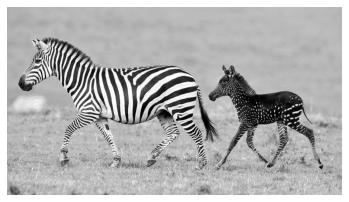

In [139]:
myimshow(img)


In [22]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

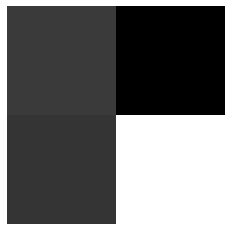

In [147]:
dimFiltro=np.array([3,3])

filtro=genGabor(dimFiltro,4,90)


plt.imshow(filtro)
plt.axis('off')
plt.show()





2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

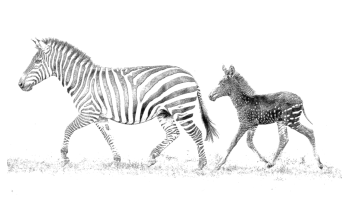

In [150]:
result=np.clip(convolve(img,filtro,mode='constant', cval=0.0),0,1)
plt.imshow(result)
plt.axis('off')
plt.show()

#IL FILTRO DI GABOR INDIVIDUA LE STRISCE E QUINDI BORDI 
#E' UN RILEVATORE DI BORDI
#RILEVATORE DI TRAME

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

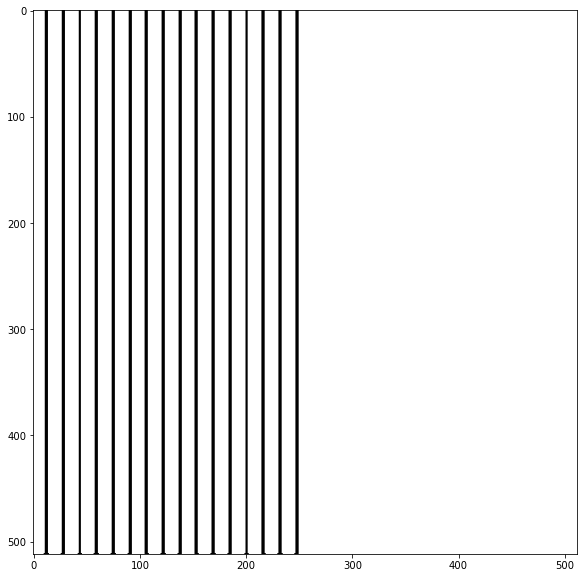

In [177]:
img2 =  imageio.imread('gabor1.jpg')
dimFiltro=np.array([3,3])
filtro=genGabor(dimFiltro,0.1,90)
result=np.clip(convolve(img2,filtro,mode='constant', cval=0.0),0,1)

plt.figure(figsize=(15,10))
plt.imshow(result)
plt.show()

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

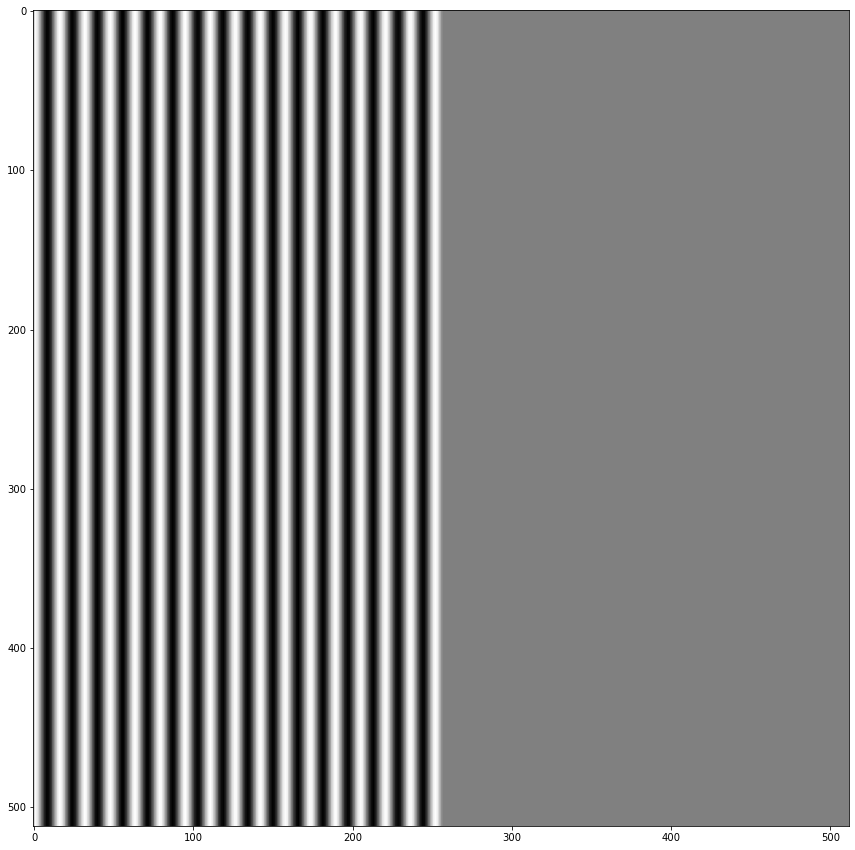

In [356]:
img2 =  imageio.imread('gabor1.jpg')
sobel=filters.sobel_v(img2)
plt.imshow(sobel)

#APPLICHIAMO IL FILTRO DI SOBEL CHE CI PERMETTE DI INDIVISUARE I CONTORNI ,FILTRO PASSA ALTO
#UTILIZZO IL FILTRO DI SOBEL ORIZZONTALE CHE CI PERMETTE DI INDIVIDUARE LE VARIAZIONI PARALLELE ALL'ASSE DELLE ORDINATE
#NEL CODICE UTILIZZO SOVEL_V DELLA LIBRERIA SKIIMAGE CHE SAREBBE IL VERTICALE MA VIENE ESEGUITO IN MANIERA OPPOSTA DALLA TEORIA

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

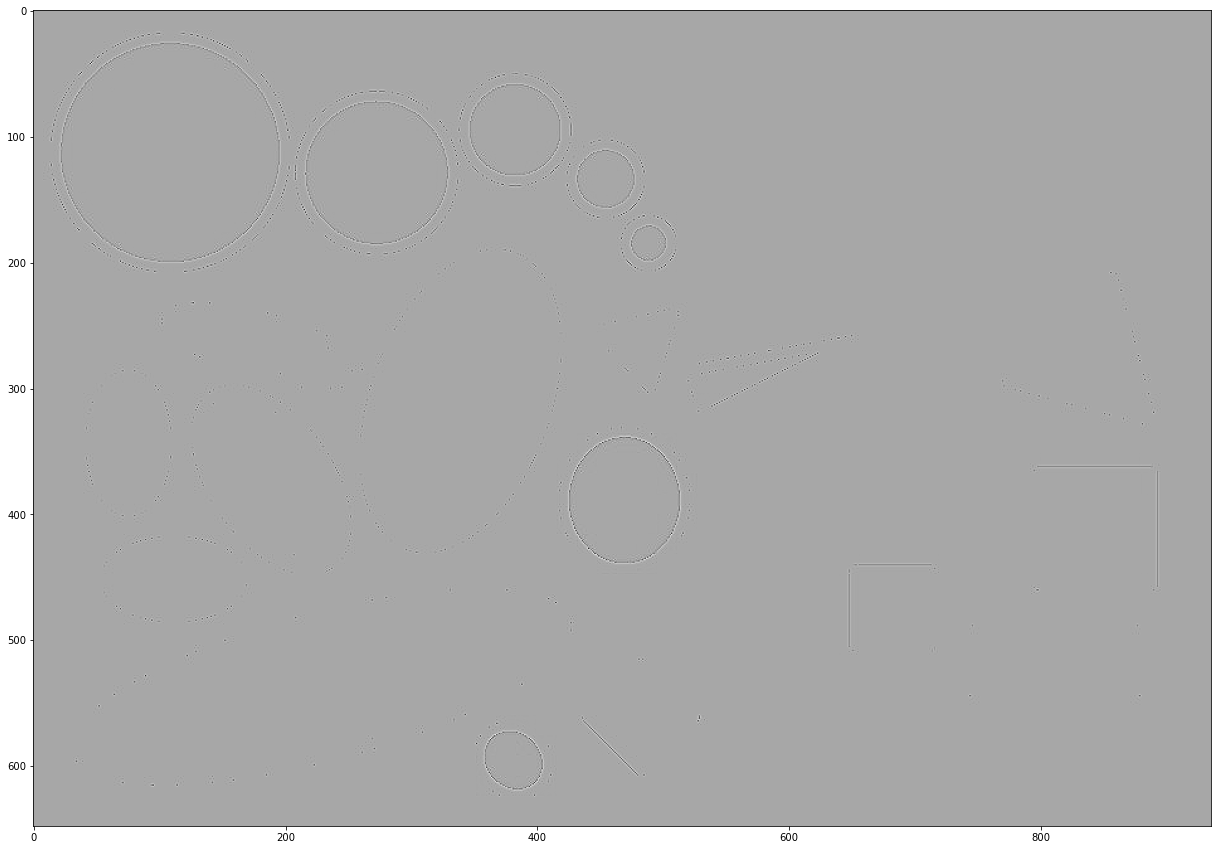

In [412]:
cerchi=rgb2gray(imageio.imread('cerchi.jpg'))

print(M)print(M)print(M)
lap=filters.laplace(cerchi)

plt.imshow(lap,cmap='gray')
plt.show()

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

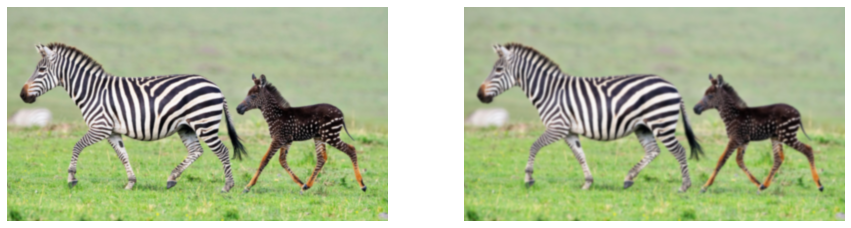

In [386]:
from skimage import data,io,color,filters,img_as_float, img_as_ubyte,transform
zebra=imageio.imread('zebra.jpg')

gauss1=filters.gaussian(zebra,3,multichannel=True)
gauss2=filters.gaussian(gauss1,3,multichannel=True)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(gauss1,cmap=cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gauss2,cmap=cm.gray)
plt.axis('off')
plt.show()


#LA TRASFORMAZIONE EQUIVALE A SFOCARE L'IMMAGINE



# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

(1, 4, 3)


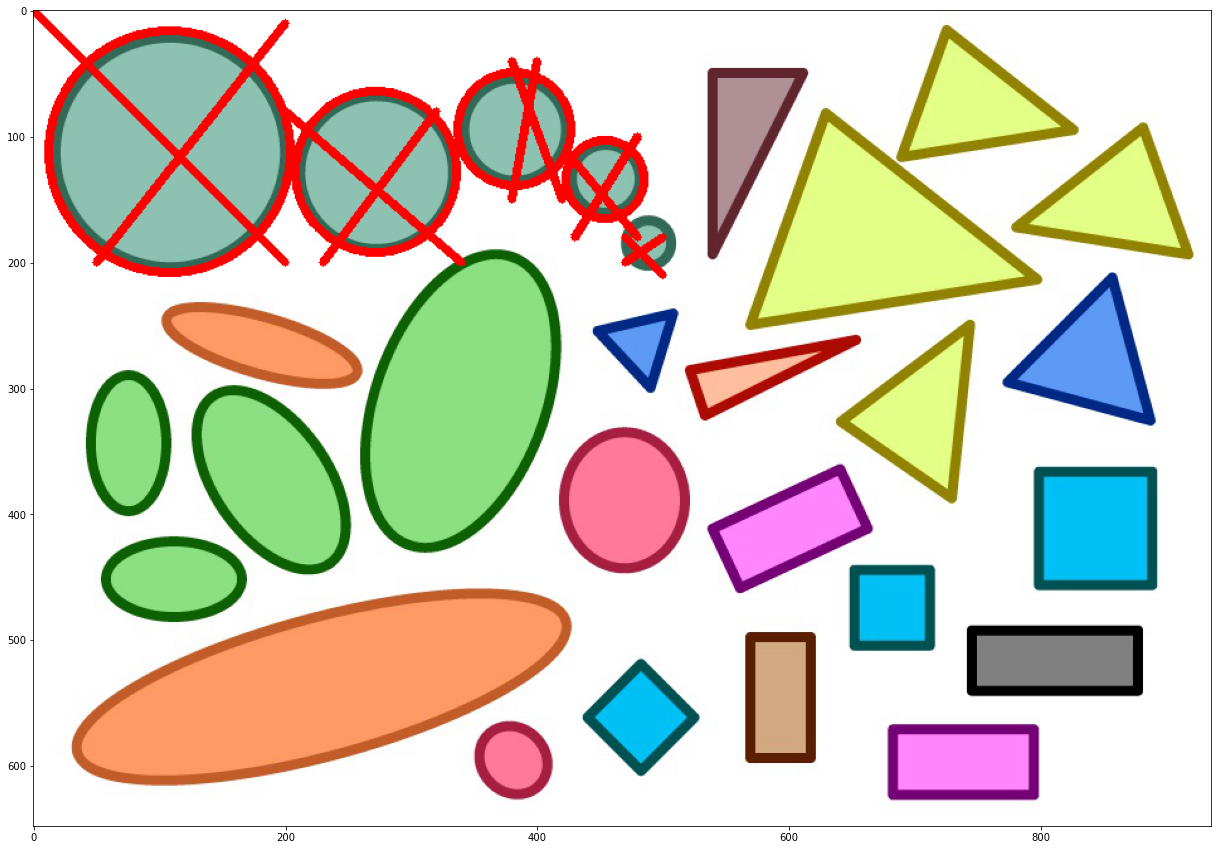

In [350]:
from skimage import data,io,color,filters,img_as_float, img_as_ubyte,transform
import cv2 

original=(imageio.imread('forme.jpg'))
cerchi=rgb2gray(imageio.imread('forme.jpg'))


cerchi = cv2.GaussianBlur(cerchi, (41, 41), 3)


img = img_as_ubyte(cerchi)




circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=30, param1=200, param2=90, minRadius=1, maxRadius=100)
circles = np.uint16(np.around(circles_float)) #ARROTONDO I VALORI
print(circles.shape)

circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]

img_coin = np.copy(original)

for i in range(circles.shape[0]):
    c = (circles[i, 0], circles[i, 1])
    r = circles[i, 2]

    cv2.circle(img_coin, c, r, (255,0, 0), 5)
    
    
cv2.line(img_coin, (0,0),(200,200) , (255,0,0), 5)
cv2.line(img_coin, (50,200),(200,10) , (255,0,0), 5)

cv2.line(img_coin, (230,200),(320,80) , (255,0,0), 5)
cv2.line(img_coin, (200,80),(340,200) , (255,0,0), 5)

cv2.line(img_coin, (380,150),(400,40) , (255,0,0), 5)
cv2.line(img_coin, (380,40),(420,150) , (255,0,0), 5)

cv2.line(img_coin, (430,180),(480,100) , (255,0,0), 5)
cv2.line(img_coin, (430,120),(480,180) , (255,0,0), 5)

cv2.line(img_coin, (470,200),(500,180) , (255,0,0), 5)
cv2.line(img_coin, (430,120),(480,180) , (255,0,0), 5)

cv2.line(img_coin, (470,200),(500,180) , (255,0,0), 5)
cv2.line(img_coin, (470,180),(500,210) , (255,0,0), 5)

plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(img_coin);


# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 90° in senso orario in (5, 5) e una traslazione di 50 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

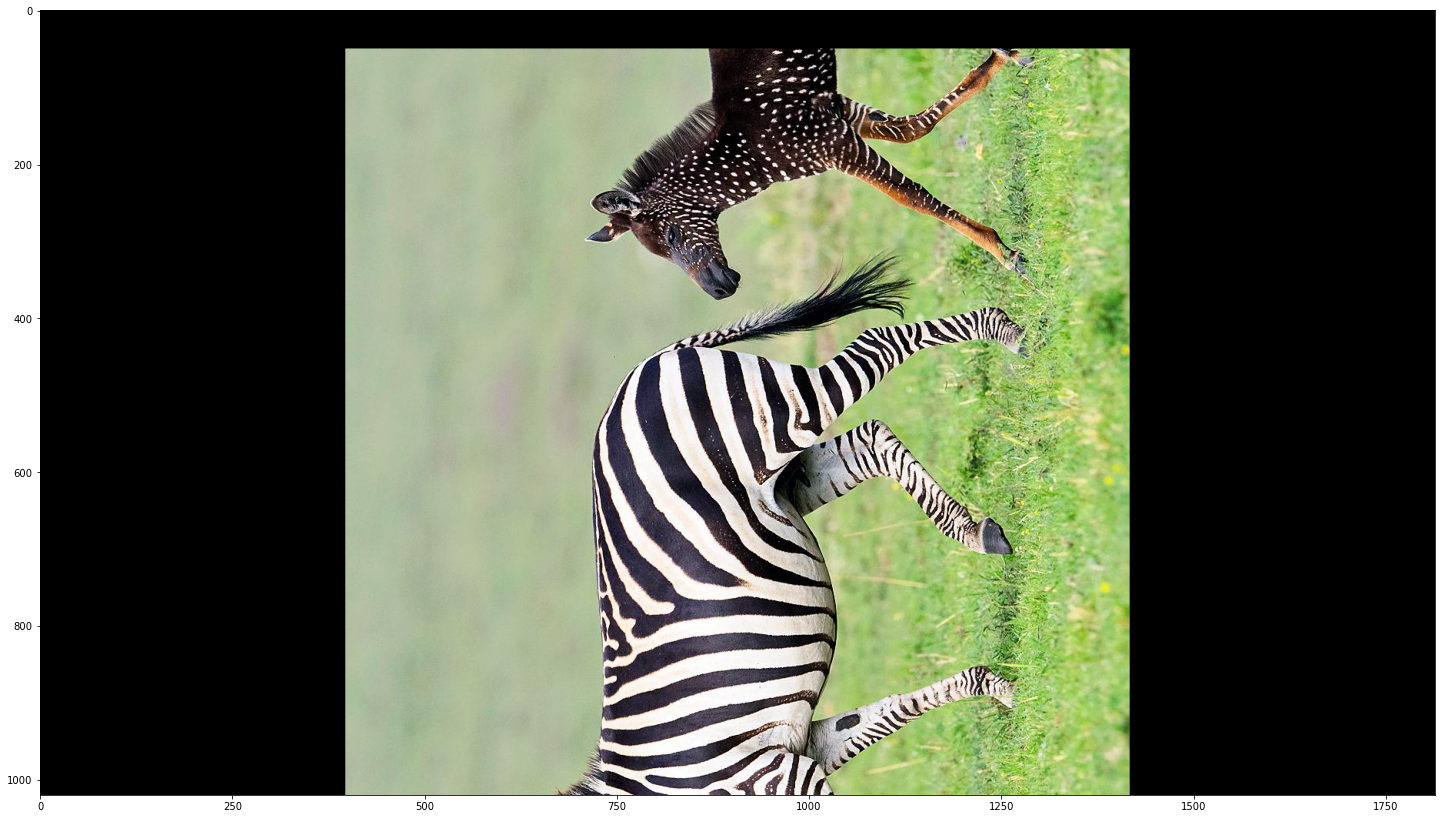

In [403]:
from skimage.transform import SimilarityTransform

zebra=imageio.imread('zebra.jpg')


rows,cols,colore = zebra.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) # params: center, angle, scale
dst1 = cv2.warpAffine(zebra,M,(cols,rows))



M = np.float32([[1,0,0],[0,1,50]]) # 3 x 2


dst = cv2.warpAffine(dst1, M, (cols,rows))



plt.imshow(dst)